In [1]:
import sys
! "{sys.executable}" -m pip install yellowbrick


Defaulting to user installation because normal site-packages is not writeable


In [2]:
from yellowbrick.classifier import ConfusionMatrix


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib
import warnings
import time
warnings.filterwarnings("ignore")
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
sns.set(style="whitegrid")


In [4]:
df=pd.read_csv("insurance.csv")
# Loads the dataset from a CSV file named data.csv into a pandas DataFrame (insurance_cust

df.head()
# Displays the dataset

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1       1   44                1         28.0                   0   
1   2       1   76                1          3.0                   0   
2   3       1   47                1         28.0                   0   
3   4       1   21                1         11.0                   1   
4   5       0   29                1         41.0                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0            2               1         40454.0                  26.0      217   
1            1               0         33536.0                  26.0      183   
2            2               1         38294.0                  26.0       27   
3            0               0         28619.0                 152.0      203   
4            0               0         27496.0                 152.0       39   

   Response  Premium_per_Vintage  
0         1           185.568807  
1         0           182.260870  
2         1          1367.642857  
3         0           140.289216  
4         0           687.400000

In [5]:
# Display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
 12  Premium_per_Vintage   381109 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 37.8 MB


In [6]:
print("Columns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)
print("\nMissing counts:\n", df.isnull().sum())

Columns: ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response', 'Premium_per_Vintage']

Dtypes:
 id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
Premium_per_Vintage     float64
dtype: object

Missing counts:
 id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Premium_per_Vintage 

In [7]:
df.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [8]:
display(df.describe().T)

count           mean            std          min  \
id                    381109.0  190555.000000  110016.836208     1.000000   
Gender                381109.0       0.540761       0.498336     0.000000   
Age                   381109.0      38.822584      15.511611    20.000000   
Driving_License       381109.0       0.997869       0.046110     0.000000   
Region_Code           381109.0      26.388807      13.229888     0.000000   
Previously_Insured    381109.0       0.458210       0.498251     0.000000   
Vehicle_Age           381109.0       0.609616       0.567439     0.000000   
Vehicle_Damage        381109.0       0.504877       0.499977     0.000000   
Annual_Premium        381109.0   30564.389581   17213.155057  2630.000000   
Policy_Sales_Channel  381109.0     112.034295      54.203995     1.000000   
Vintage               381109.0     154.347397      83.671304    10.000000   
Response              381109.0       0.122563       0.327936     0.000000   
Premium_per_Vintage   381109.0     353.582366     515.804421     8.766667   

                               25%            50%            75%  \
id                    95278.000000  190555.000000  285832.000000   
Gender                    0.000000       1.000000       1.000000   
Age                      25.000000      36.000000      49.000000   
Driving_License           1.000000       1.000000       1.000000   
Region_Code              15.000000      28.000000      35.000000   
Previously_Insured        0.000000       0.000000       1.000000   
Vehicle_Age               0.000000       1.000000       1.000000   
Vehicle_Damage            0.000000       1.000000       1.000000   
Annual_Premium        24405.000000   31669.000000   39400.000000   
Policy_Sales_Channel     29.000000     133.000000     152.000000   
Vintage                  82.000000     154.000000     227.000000   
Response                  0.000000       0.000000       0.000000   
Premium_per_Vintage     116.669261     193.432099     370.258824   

                                max  
id                    381109.000000  
Gender                     1.000000  
Age                       85.000000  
Driving_License            1.000000  
Region_Code               52.000000  
Previously_Insured         1.000000  
Vehicle_Age                2.000000  
Vehicle_Damage             1.000000  
Annual_Premium        540165.000000  
Policy_Sales_Channel     163.000000  
Vintage                  299.000000  
Response                   1.000000  
Premium_per_Vintage    31469.466667

In [9]:

df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1       1   44                1         28.0                   0   
1   2       1   76                1          3.0                   0   
2   3       1   47                1         28.0                   0   
3   4       1   21                1         11.0                   1   
4   5       0   29                1         41.0                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0            2               1         40454.0                  26.0      217   
1            1               0         33536.0                  26.0      183   
2            2               1         38294.0                  26.0       27   
3            0               0         28619.0                 152.0      203   
4            0               0         27496.0                 152.0       39   

   Response  Premium_per_Vintage  
0         1           185.568807  
1         0           182.260870  
2         1          1367.642857  
3         0           140.289216  
4         0           687.400000

In [10]:
# Get the summary statistics for numerical variables
df.describe().T

count           mean            std          min  \
id                    381109.0  190555.000000  110016.836208     1.000000   
Gender                381109.0       0.540761       0.498336     0.000000   
Age                   381109.0      38.822584      15.511611    20.000000   
Driving_License       381109.0       0.997869       0.046110     0.000000   
Region_Code           381109.0      26.388807      13.229888     0.000000   
Previously_Insured    381109.0       0.458210       0.498251     0.000000   
Vehicle_Age           381109.0       0.609616       0.567439     0.000000   
Vehicle_Damage        381109.0       0.504877       0.499977     0.000000   
Annual_Premium        381109.0   30564.389581   17213.155057  2630.000000   
Policy_Sales_Channel  381109.0     112.034295      54.203995     1.000000   
Vintage               381109.0     154.347397      83.671304    10.000000   
Response              381109.0       0.122563       0.327936     0.000000   
Premium_per_Vintage   381109.0     353.582366     515.804421     8.766667   

                               25%            50%            75%  \
id                    95278.000000  190555.000000  285832.000000   
Gender                    0.000000       1.000000       1.000000   
Age                      25.000000      36.000000      49.000000   
Driving_License           1.000000       1.000000       1.000000   
Region_Code              15.000000      28.000000      35.000000   
Previously_Insured        0.000000       0.000000       1.000000   
Vehicle_Age               0.000000       1.000000       1.000000   
Vehicle_Damage            0.000000       1.000000       1.000000   
Annual_Premium        24405.000000   31669.000000   39400.000000   
Policy_Sales_Channel     29.000000     133.000000     152.000000   
Vintage                  82.000000     154.000000     227.000000   
Response                  0.000000       0.000000       0.000000   
Premium_per_Vintage     116.669261     193.432099     370.258824   

                                max  
id                    381109.000000  
Gender                     1.000000  
Age                       85.000000  
Driving_License            1.000000  
Region_Code               52.000000  
Previously_Insured         1.000000  
Vehicle_Age                2.000000  
Vehicle_Damage             1.000000  
Annual_Premium        540165.000000  
Policy_Sales_Channel     163.000000  
Vintage                  299.000000  
Response                   1.000000  
Premium_per_Vintage    31469.466667

In [11]:
# Get the summary statistics for categorical variables
# The previous code 'df.describe(include='object')' resulted in a ValueError
# because there are no columns with 'object' dtype in the DataFrame.
# All categorical columns are currently stored as numerical types (int64 or float64).

# To get descriptive statistics for columns that are likely categorical
# but are represented as numbers, we can manually select them and
# display their value counts.

categorical_cols_as_numbers = ['Gender', 'Driving_License', 'Previously_Insured',
                               'Vehicle_Age', 'Vehicle_Damage', 'Response']

print("Descriptive statistics for likely categorical columns (represented as numbers):")
for col in categorical_cols_as_numbers:
    print(f"\n--- {col} ---")
    display(df[col].value_counts())
    print(f"Percentage distribution for {col}:")
    display(df[col].value_counts(normalize=True) * 100)

# If you want to include 'Region_Code' and 'Policy_Sales_Channel'
# which might also be categorical but have more unique values,
# you can add them to the list and inspect their value counts as well.
# For example:
# print("\n--- Region_Code ---")
# display(df['Region_Code'].value_counts().head()) # Display top few for columns with many unique values
# print(f"Number of unique values for Region_Code: {df['Region_Code'].nunique()}")

Descriptive statistics for likely categorical columns (represented as numbers):

--- Gender ---


Gender
1    206089
0    175020
Name: count, dtype: int64

Percentage distribution for Gender:


Gender
1    54.07613
0    45.92387
Name: proportion, dtype: float64


--- Driving_License ---


Driving_License
1    380297
0       812
Name: count, dtype: int64

Percentage distribution for Driving_License:


Driving_License
1    99.786938
0     0.213062
Name: proportion, dtype: float64


--- Previously_Insured ---


Previously_Insured
0    206481
1    174628
Name: count, dtype: int64

Percentage distribution for Previously_Insured:


Previously_Insured
0    54.178988
1    45.821012
Name: proportion, dtype: float64


--- Vehicle_Age ---


Vehicle_Age
1    200316
0    164786
2     16007
Name: count, dtype: int64

Percentage distribution for Vehicle_Age:


Vehicle_Age
1    52.561341
0    43.238549
2     4.200111
Name: proportion, dtype: float64


--- Vehicle_Damage ---


Vehicle_Damage
1    192413
0    188696
Name: count, dtype: int64

Percentage distribution for Vehicle_Damage:


Vehicle_Damage
1    50.487656
0    49.512344
Name: proportion, dtype: float64


--- Response ---


Response
0    334399
1     46710
Name: count, dtype: int64

Percentage distribution for Response:


Response
0    87.743664
1    12.256336
Name: proportion, dtype: float64

In [12]:
df["Vehicle_Damage"].replace(to_replace="Yes",value=1,inplace=False)
df["Vehicle_Damage"].replace(to_replace="No",value=0,inplace=False)

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    1
381108    0
Name: Vehicle_Damage, Length: 381109, dtype: int64

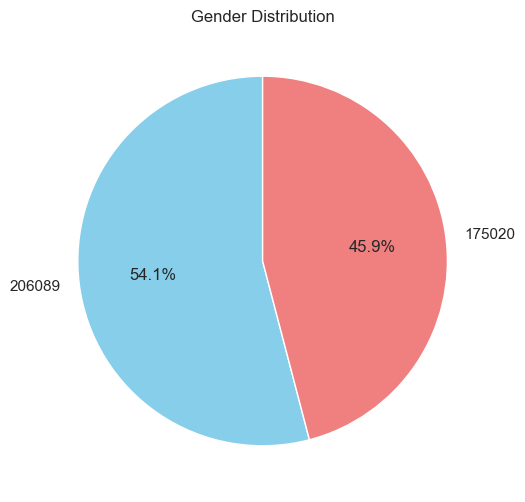

In [13]:
import seaborn as sns
# Seaborn library a Python library for data visualization

gender_counts = df['Gender'].value_counts()
#value_counts(): Counts occurrences of each gender in the Gender column.

plt.figure(figsize=(6, 6)) # Sets the figure size to 6x6 inches.
plt.pie(gender_counts, labels=gender_counts, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
# labels: Gender labels, autopct='%1.1f%%': Shows percentages with 1 decimal.
# colors: Assigns colors (skyblue and lightcoral) , startangle=90: Starts the 1st segment at 90 degrees.
plt.title('Gender Distribution')    # Adds the chart title.
plt.show()

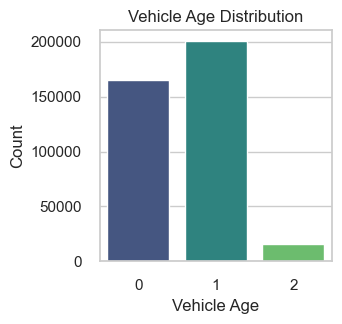

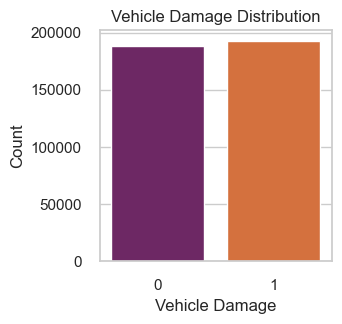

In [14]:
plt.figure(figsize=(3,3,))
sns.countplot(x='Vehicle_Age', data=df, palette='viridis')
plt.title('Vehicle Age Distribution')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(3,3,))
sns.countplot(x='Vehicle_Damage', data=df, palette='inferno')
plt.title('Vehicle Damage Distribution')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()


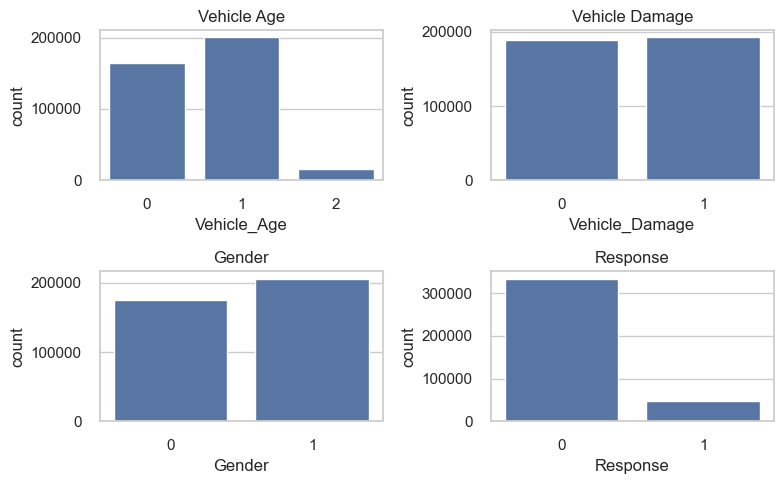

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

sns.countplot(x='Vehicle_Age', data=df, ax=axes[0,0])
sns.countplot(x='Vehicle_Damage', data=df, ax=axes[0,1])
sns.countplot(x='Gender', data=df, ax=axes[1,0])
sns.countplot(x='Response', data=df, ax=axes[1,1])

axes[0,0].set_title("Vehicle Age")
axes[0,1].set_title("Vehicle Damage")
axes[1,0].set_title("Gender")
axes[1,1].set_title("Response")

plt.tight_layout()
plt.show()


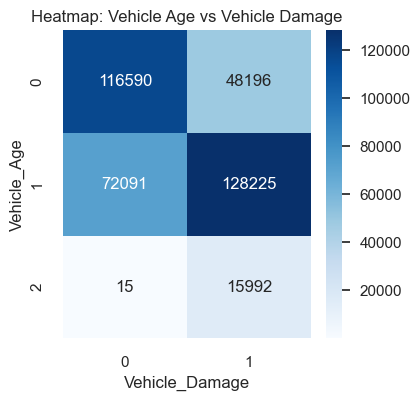

In [16]:
cross_tab = pd.crosstab(df['Vehicle_Age'], df['Vehicle_Damage'])

plt.figure(figsize=(4,4))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap: Vehicle Age vs Vehicle Damage')
plt.show()


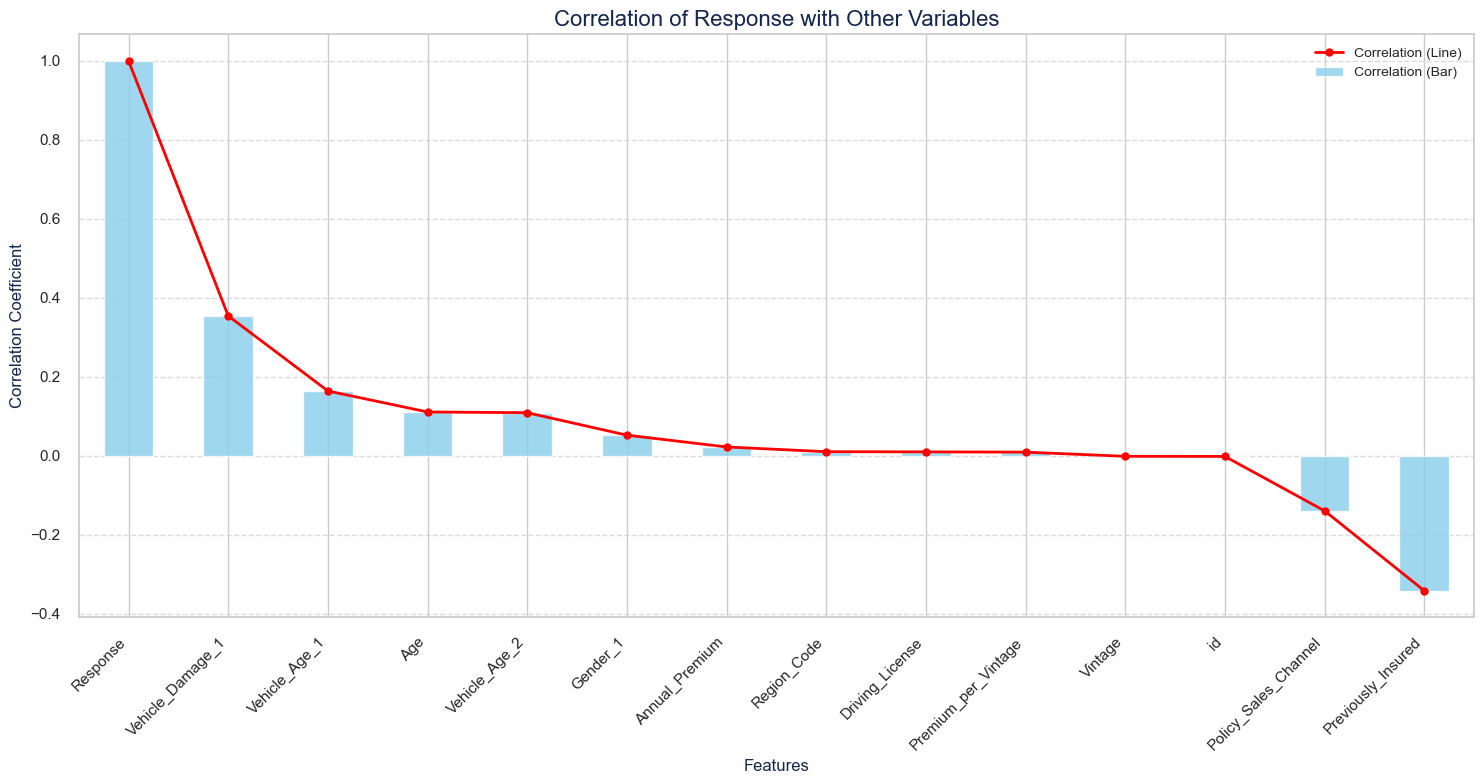

In [17]:
#  visualizes the correlations of features with the target variable (Response)

# Create a copy of df to perform encoding without altering the original df
df_encoded_for_corr = df.copy()

# Identify categorical columns
categorical_cols_for_corr = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

# Apply one-hot encoding to categorical columns
df_encoded_for_corr = pd.get_dummies(df_encoded_for_corr, columns=categorical_cols_for_corr, drop_first=True)

# Compute correlations
correlations = df_encoded_for_corr.corr()['Response'].sort_values(ascending=False)
# df_encoded_for_corr.corr()['Response']: Computes correlations between all columns and Response.
# sort_values(ascending=False): Sorts correlations in descending order.

# Create the figure
plt.figure(figsize=(15, 8))

# Plot the bar chart
correlations.plot(kind='bar', color='skyblue', alpha=0.8, label='Correlation (Bar)')   #  Plots a bar chart of correlations with Response.

# Overlay a line plot: Adds a red line plot showing correlation values.
plt.plot(correlations.index, correlations.values, color='red', marker='o', linewidth=2, label='Correlation (Line)')

# Add title and labels
plt.title('Correlation of Response with Other Variables', fontsize=16, color='#13274F')
plt.xlabel('Features', fontsize=12, color='#13274F')
plt.ylabel('Correlation Coefficient', fontsize=12, color='#13274F')

# Add legend
plt.legend(fontsize=10)
# plt.legend(): Adds a legend to differentiate the line and bar.

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better  clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()         #Adjusts layout to avoid overlap.

# Show the plot
plt.show()

In [18]:
df_encoded_for_corr.value_counts()

id      Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  Policy_Sales_Channel  Vintage  Response  Premium_per_Vintage  Gender_1  Vehicle_Age_1  Vehicle_Age_2  Vehicle_Damage_1
381109  46   1                29.0         0                   41777.0         26.0                  237      0         175.533613           True      True           False          False               1
1       44   1                28.0         0                   40454.0         26.0                  217      1         185.568807           True      False          True           True                1
2       76   1                3.0          0                   33536.0         26.0                  183      0         182.260870           True      True           False          False               1
3       47   1                28.0         0                   38294.0         26.0                  27       1         1367.642857          True      False          True           True        

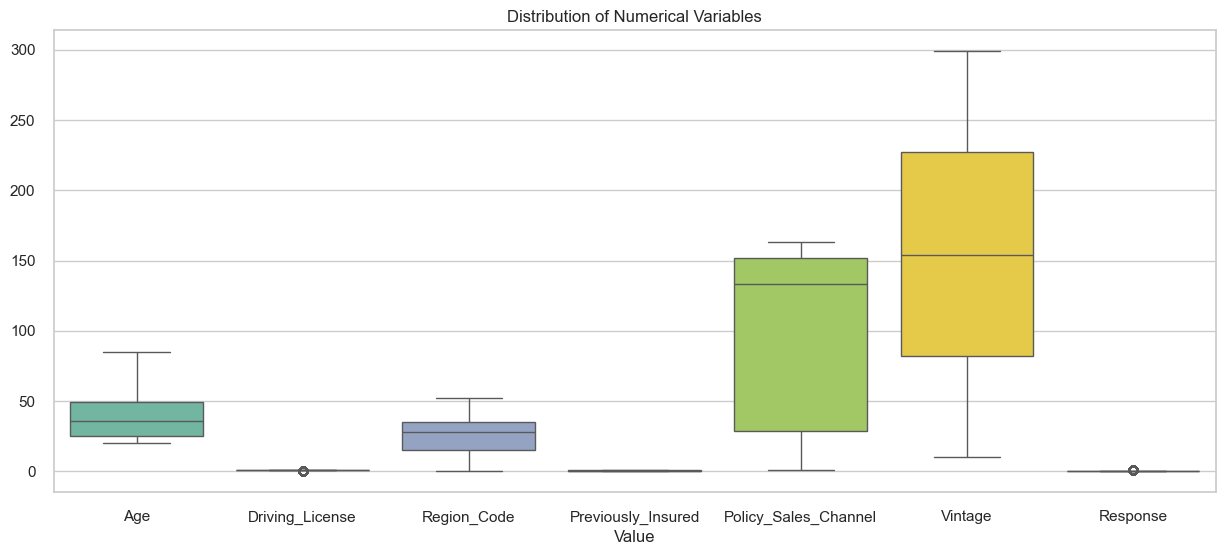

In [19]:
numerical_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
                  'Policy_Sales_Channel', 'Vintage', 'Response']
# numerical_cols: Selects numerical columns from the dataset: Age, Driving_License, Region_Code, Previously_Insured, Policy_Sales_Channel, Vintage, and Response.

plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numerical_cols], orient='v', palette='Set2')
# sns.boxplot(): Plots the box plot for the selected numerical columns.
# orient='v': Displays the boxes horizontally.
# palette='Set2': Applies a soft color palette.

plt.title('Distribution of Numerical Variables')
plt.xlabel('Value')
plt.show()

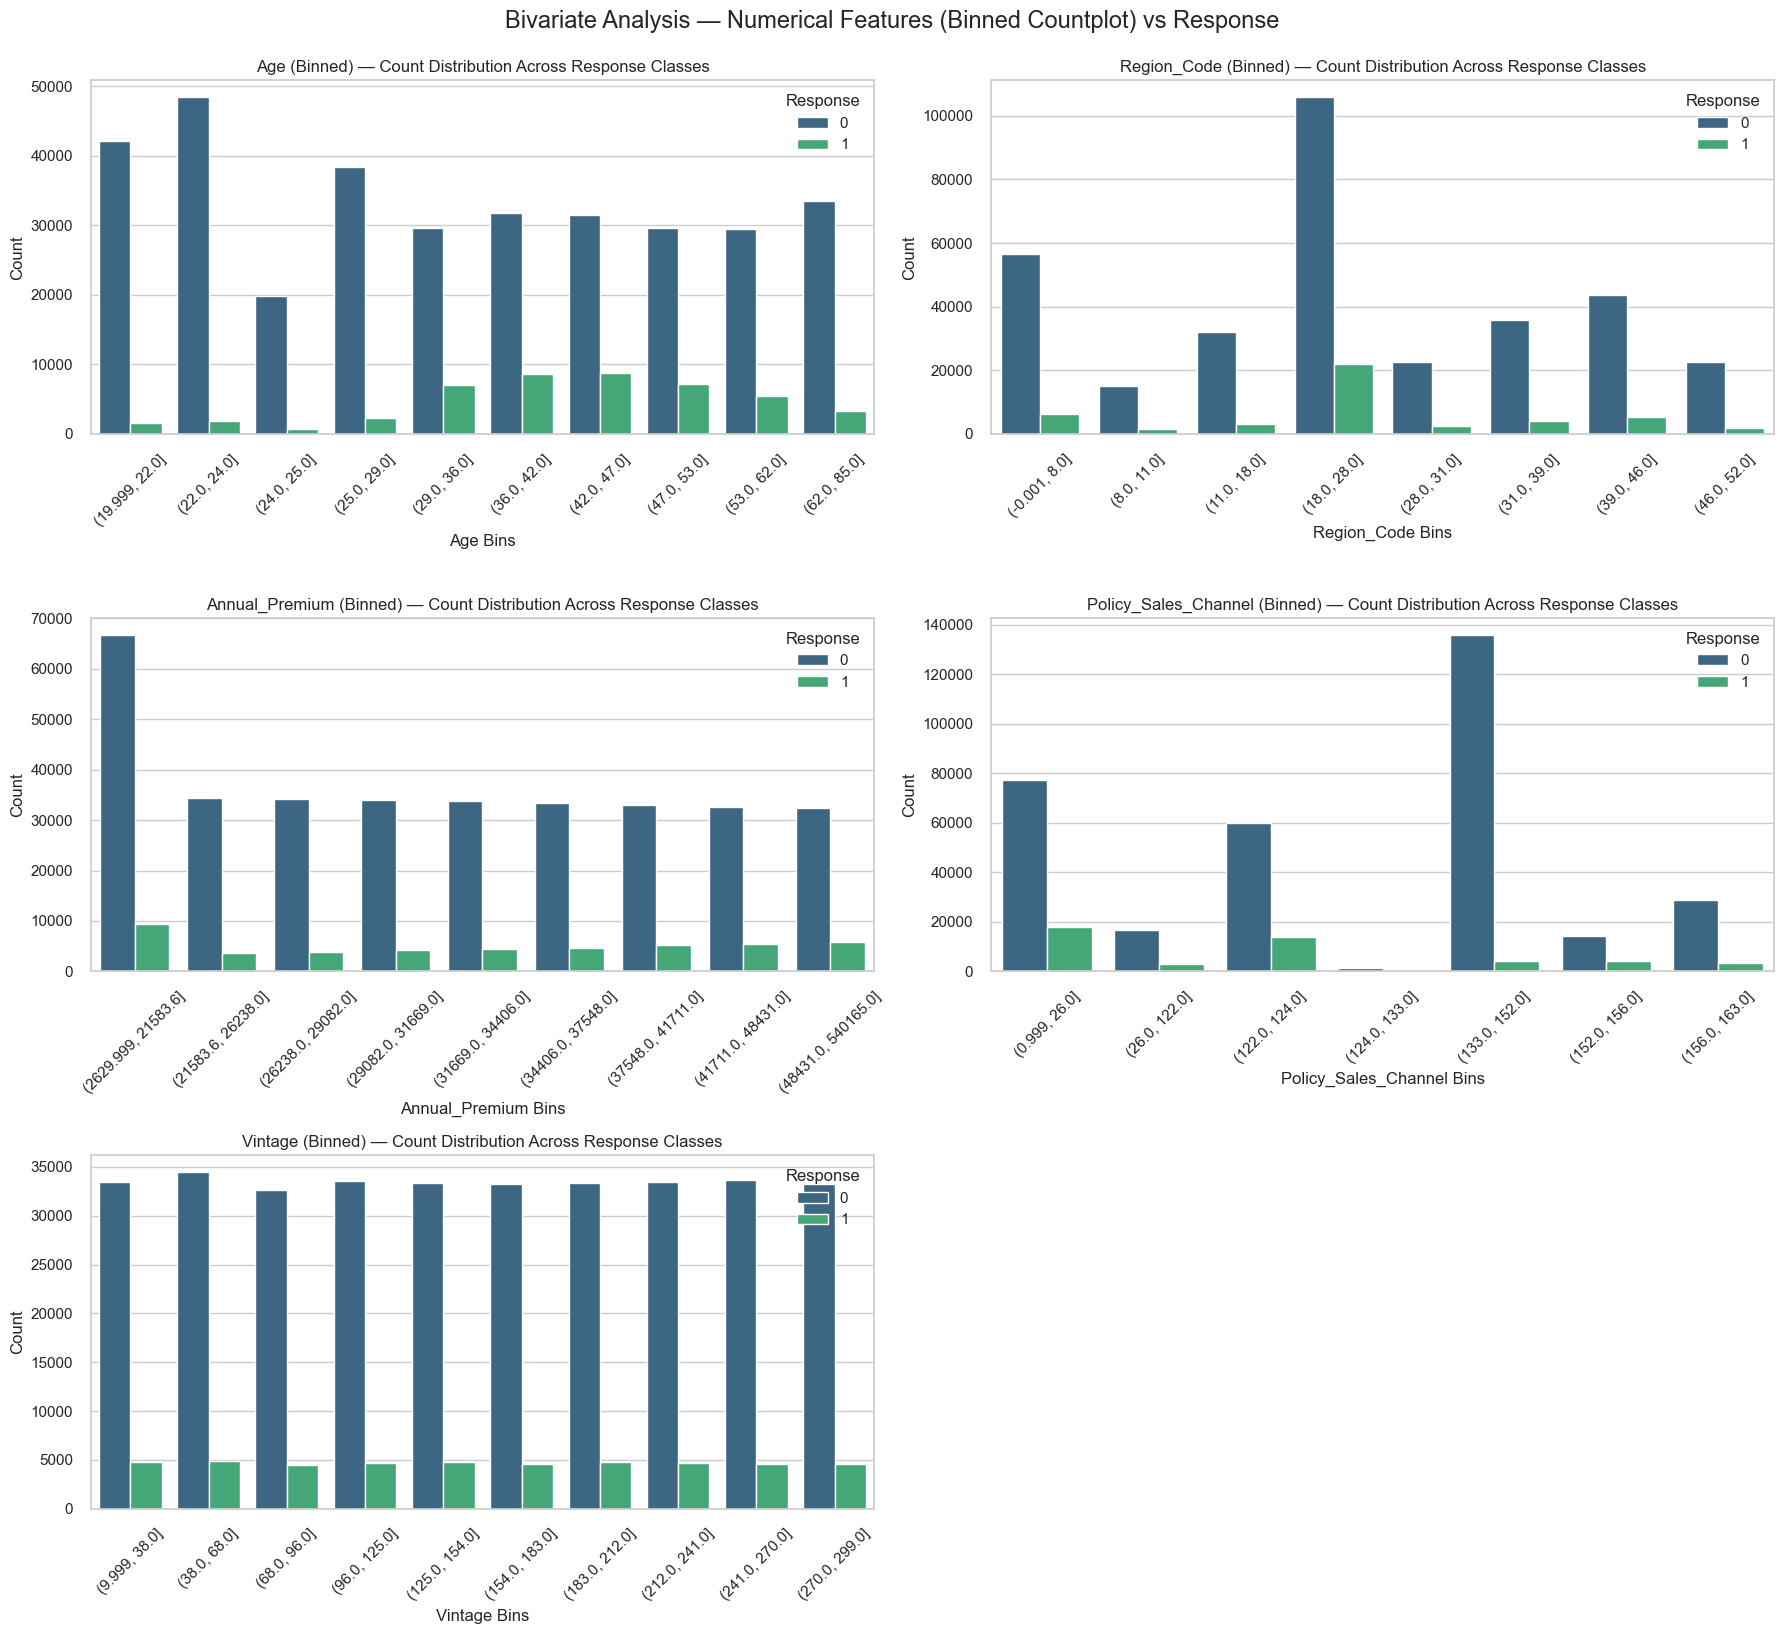

In [20]:
import pandas as pd

# Numerical columns
numerical_cols = [
    'Age',
    'Region_Code',
    'Annual_Premium',
    'Policy_Sales_Channel',
    'Vintage'
]

plt.figure(figsize=(18, 16))

for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, idx)

    # Create 10 bins for continuous numeric columns
    df[col+"_binned"] = pd.qcut(df[col], q=10, duplicates='drop')

    sns.countplot(
        x=col + "_binned",
        hue='Response',
        data=df,
        palette='viridis'
    )

    plt.title(f"{col} (Binned) — Count Distribution Across Response Classes")
    plt.xlabel(f"{col} Bins")
    plt.ylabel("Count")

    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle("Bivariate Analysis — Numerical Features (Binned Countplot) vs Response", fontsize=17, y=1.02)
plt.show()


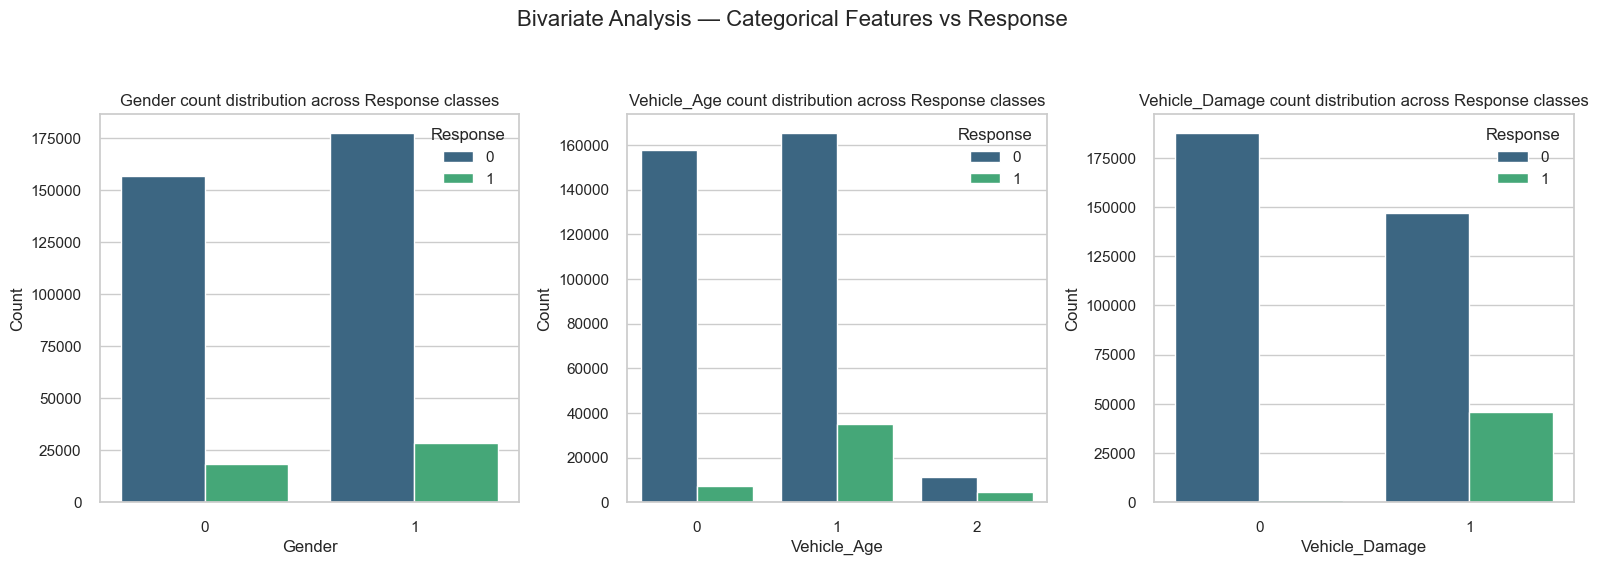

In [21]:
# Categorical columns
cat_cols = [
    'Gender',
    'Vehicle_Age',
    'Vehicle_Damage'
]

plt.figure(figsize=(16, 14))

for idx, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, idx)
    sns.countplot(
        x=col,
        hue='Response',   # shows how each category distributes across Response
        data=df,
        palette='viridis'
    )
    plt.title(f"{col} count distribution across Response classes")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.suptitle("Bivariate Analysis — Categorical Features vs Response", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


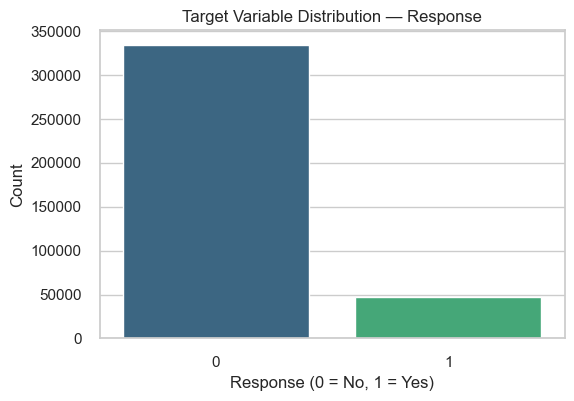

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Response', data=df, palette='viridis')
plt.title("Target Variable Distribution — Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


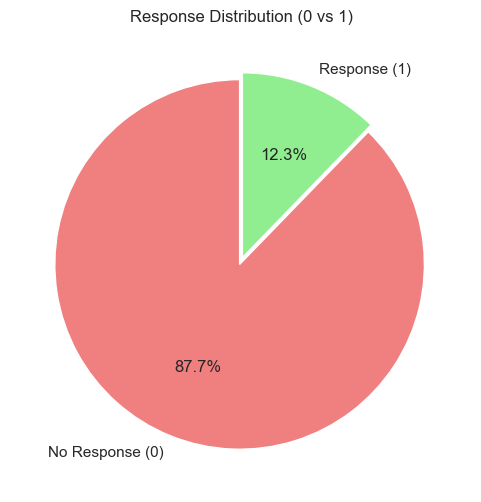

In [23]:
# Count values in Response column
response_counts = df['Response'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(6,6))
plt.pie(response_counts,
        labels=['No Response (0)', 'Response (1)'],   # Labels for slices
        autopct='%1.1f%%',                           # Show percentage
        colors=['lightcoral', 'lightgreen'],          # Slice colors
        startangle=90,                                # Start angle for cleaner look
        explode=[0.02, 0.02]                          # Slight separation for emphasis
       )

plt.title("Response Distribution (0 vs 1)")
plt.show()


In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns in your insurance dataset
numeric_cols = [
    'Age',
    'Region_Code',
    'Annual_Premium',
    'Policy_Sales_Channel',
    'Vintage'
]

plt.figure(figsize=(16, 10))

# Loop through each numerical column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)                          # 2 rows, 3 columns grid
    sns.histplot(df[col],
                 kde=True,                        # kde = smooth curve
                 bins=40,
                 color="dodgerblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


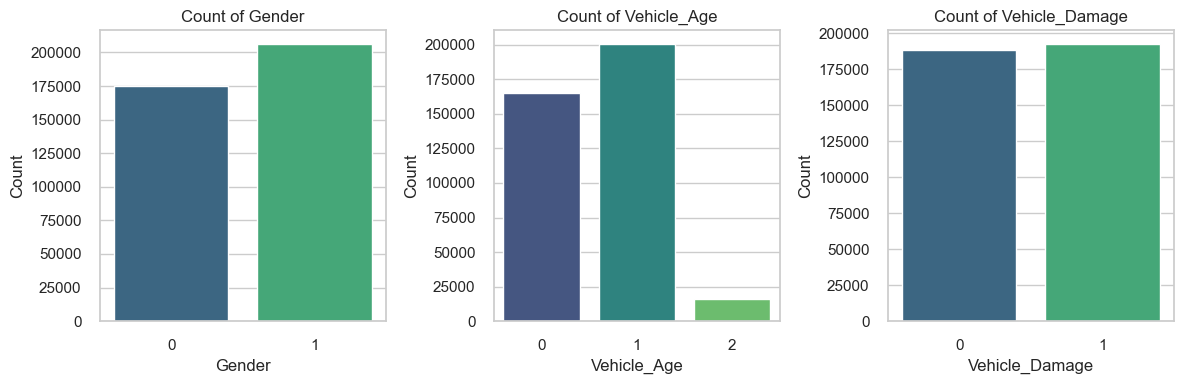

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns in your insurance dataset
cat_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

plt.figure(figsize=(12, 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)                     # 1 row, 3 charts side by side
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [26]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Annual_Premium', hue='Vehicle_Damage', kde=True, bins=40, color='purple')
plt.title("Annual Premium Distribution by Vehicle Damage")
plt.xlabel("Annual Premium")
plt.ylabel("Count")
plt.show()






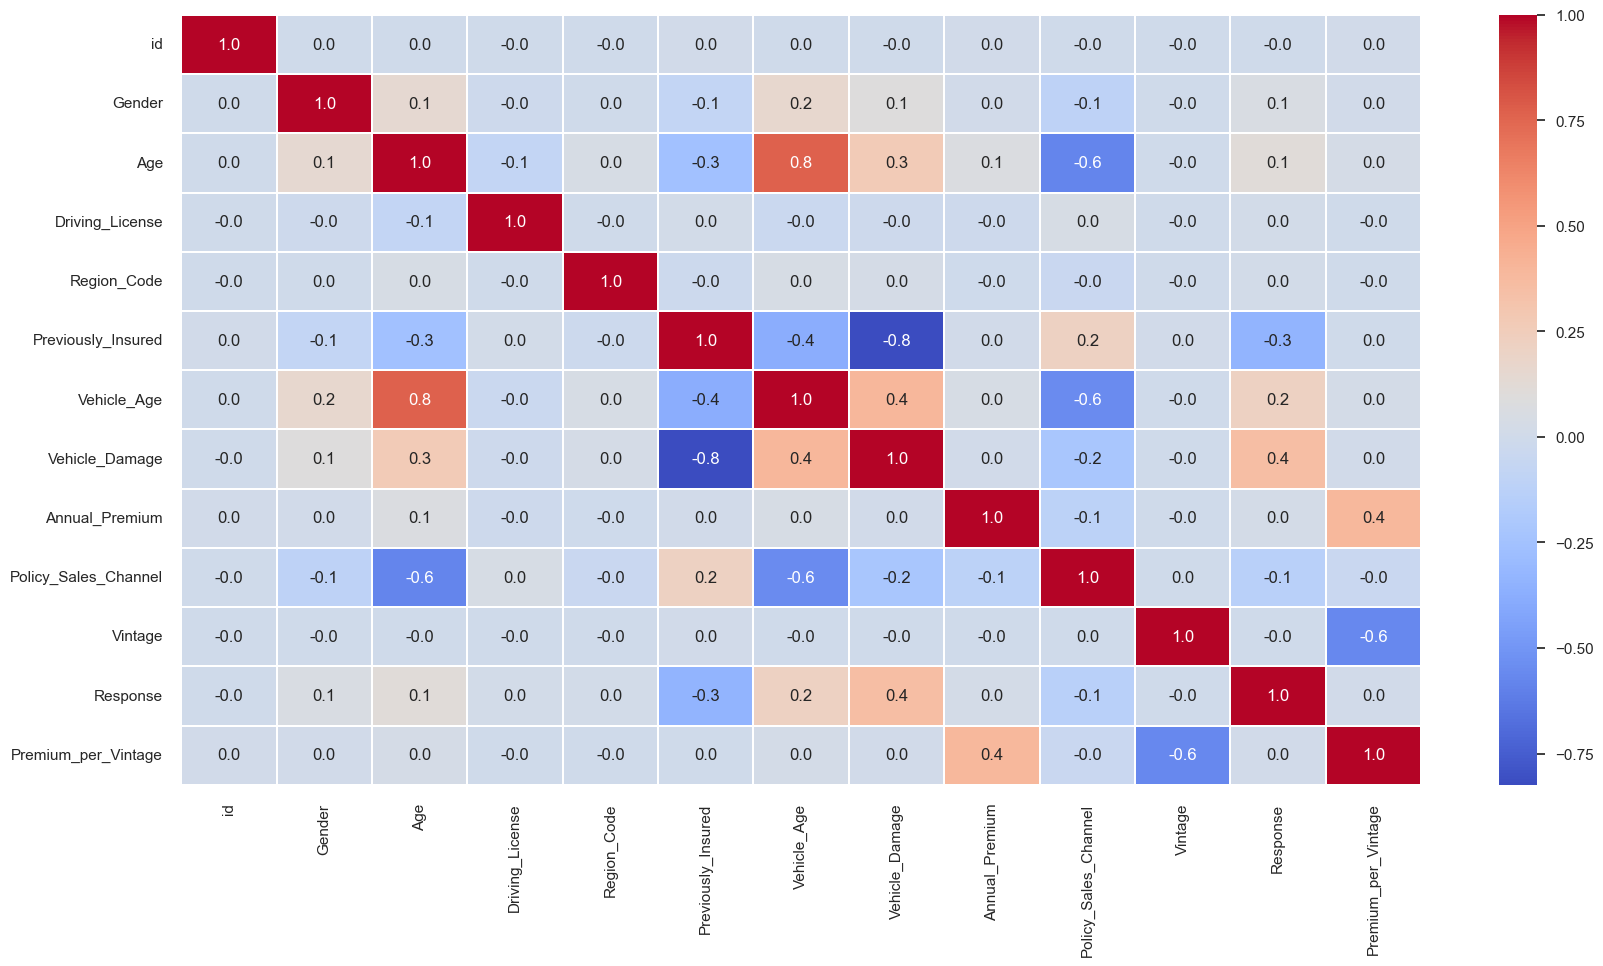

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# LabelEncoder: Encodes the Response column into numeric values (e.g., 0 and 1

df['Response'] = encoder.fit_transform(df['Response'])
insurance_cust = pd.get_dummies(df, drop_first=True)
# pd.get_dummies(drop_first=True): Converts categorical variables into dummy variables, avoiding multicollinearity.

numeric_data = insurance_cust.select_dtypes(include=['number'])
# select_dtypes(include=['number']): Filters only numerical columns for correlation analysis.
correlation_matrix = numeric_data.corr()
# numeric_data.corr(): Computes pairwise correlation coefficients between numerical columns.

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.1)
# annot=True: Displays correlation values on the heatmap.
# cmap='coolwarm': Uses a blue-to-red color gradient.
# fmt=".1f": Formats values to one decimal point.
# linewidths=0.1: Adds thin lines between cells.


plt.show()

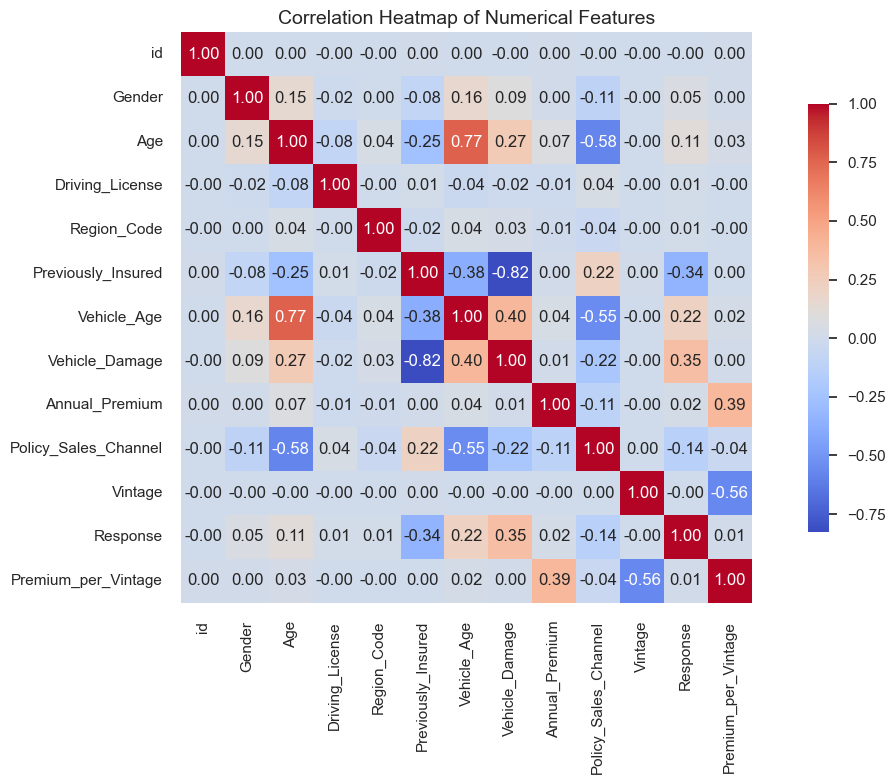

Feature 1             Feature 2  Correlation
26                 Age           Vehicle_Age     0.765790
57         Vehicle_Age        Vehicle_Damage     0.396873
71      Annual_Premium   Premium_per_Vintage     0.390723
66      Vehicle_Damage              Response     0.354400
27                 Age        Vehicle_Damage     0.267534
61         Vehicle_Age              Response     0.221874
53  Previously_Insured  Policy_Sales_Channel     0.219381
16              Gender           Vehicle_Age     0.160427
12              Gender                   Age     0.145545
31                 Age              Response     0.111147
17              Gender        Vehicle_Damage     0.091606
28                 Age        Annual_Premium     0.067507
21              Gender              Response     0.052440
43         Region_Code           Vehicle_Age     0.043778
38     Driving_License  Policy_Sales_Channel     0.043731

In [28]:


# Use your balanced dataset
# If you're using df instead, just change df_50k_balanced to df
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Correlation matrix of only numerical features
corr = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={'shrink': 0.75}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

# Get correlation pairs (upper triangle only, without duplicates)
corr_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        .stack()
        .reset_index()
        .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
        .sort_values(by='Correlation', ascending=False)
)

# Show top 15 most correlated pairs
corr_pairs.head(15)


In [29]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id                             0
Gender                         0
Age                            0
Driving_License                0
Region_Code                    0
Previously_Insured             0
Vehicle_Age                    0
Vehicle_Damage                 0
Annual_Premium                 0
Policy_Sales_Channel           0
Vintage                        0
Response                       0
Premium_per_Vintage            0
Age_binned                     0
Region_Code_binned             0
Annual_Premium_binned          0
Policy_Sales_Channel_binned    0
Vintage_binned                 0
dtype: int64


In [30]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Exclude the 'Response' column from outlier clipping as it's the target variable
if 'Response' in numeric_cols:
    numeric_cols.remove('Response')

for col in numeric_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

print("Outlier clipping completed for all numeric columns, excluding 'Response'.")

Outlier clipping completed for all numeric columns, excluding 'Response'.


In [31]:
y=df['Response'].values
x=df.drop(columns=['Response'])

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Identify categorical columns
categorical_cols = x.select_dtypes(include='object').columns

# Drop binned columns before one-hot encoding, as they are not suitable for scaling
x = x.drop(columns=[col for col in x.columns if col.endswith('_binned')], errors='ignore')

# Apply one-hot encoding to categorical columns
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

features = x.columns.values

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(x)

x = pd.DataFrame(scaler.transform(x))

x.columns = features

x.head()

id  Gender       Age  Driving_License  Region_Code  \
0  0.000000     1.0  0.369231              0.0     0.538462   
1  0.000003     1.0  0.861538              0.0     0.057692   
2  0.000005     1.0  0.415385              0.0     0.538462   
3  0.000008     1.0  0.015385              0.0     0.211538   
4  0.000010     0.0  0.138462              0.0     0.788462   

   Previously_Insured  Vehicle_Age  Vehicle_Damage  Annual_Premium  \
0                 0.0          1.0             1.0        0.638245   
1                 0.0          0.5             0.0        0.521510   
2                 0.0          1.0             1.0        0.601797   
3                 1.0          0.0             0.0        0.438540   
4                 1.0          0.0             0.0        0.419591   

   Policy_Sales_Channel   Vintage  Premium_per_Vintage  
0              0.154321  0.716263             0.238317  
1              0.154321  0.598616             0.233859  
2              0.154321  0.058824             1.000000  
3              0.932099  0.667820             0.177284  
4              0.932099  0.100346             0.914752

In [33]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
#x: Features (input data) , y: Target variable (output).
# test_size=0.2: 20% of the data is used for testing, and 80% for training.
# random_state=101: Ensures reproducibility by fixing the random seed.

x_train.shape,x_test.shape
# x_train.shape, x_test.shape: Displays the shape (number of rows and columns) of the training and testing feature sets

((304887, 12), (76222, 12))

In [34]:
from imblearn.over_sampling import SMOTE
# SMOTE (Synthetic Minority Over-sampling Technique)

from collections import Counter
# Imports the Counter class from the collections module.Counter helps count the frequency of different classes in your dataset

In [35]:
x = df.drop(['Response'], axis = 1)
# axis=1: Specifies that a column (not a row) is being dropped.

y = df.loc[:,'Response'].values
# Extracts the Response column as the target variable.
# .values: Converts the column into a NumPy array for easier manipulation during model training.

In [36]:
x.dropna(inplace=True)
# x.dropna(inplace=True) removes rows with missing values from x directly.

In [37]:
# Reload df from the CSV to ensure 'Response' column is intact
df = pd.read_csv('insurance.csv')

# Verify the response column after fresh reload
print("Response value counts after fresh reload:")
print(df['Response'].value_counts())

# Drop rows where 'Response' is NaN before splitting into x and y
df.dropna(subset=['Response'], inplace=True)

# Extract x and y
y = df["Response"].values
x = df.drop(columns=["Response"])

# Identify categorical columns for one-hot encoding
categorical_cols = x.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

# Ensure x has no NaNs after one-hot encoding (if any numeric NaNs remain)
# Impute missing values in 'x' before SMOTE
# Re-initialize imputer if it was previously used in a different context
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Choose an appropriate strategy

# Fit and transform x. It's important to keep x as a DataFrame to retain column names
x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Now apply SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))

x_res, y_res = sm.fit_resample(x, y)

print('Resampled dataset shape %s' % Counter(y_res))

Response value counts after fresh reload:
Response
0    334399
1     46710
Name: count, dtype: int64
Original dataset shape Counter({np.int64(0): 334399, np.int64(1): 46710})
Resampled dataset shape Counter({np.int64(1): 334399, np.int64(0): 334399})


In [38]:
x

id  Gender   Age  Driving_License  Region_Code  \
0            1.0     1.0  44.0              1.0         28.0   
1            2.0     1.0  76.0              1.0          3.0   
2            3.0     1.0  47.0              1.0         28.0   
3            4.0     1.0  21.0              1.0         11.0   
4            5.0     0.0  29.0              1.0         41.0   
...          ...     ...   ...              ...          ...   
381104  381105.0     1.0  74.0              1.0         26.0   
381105  381106.0     1.0  30.0              1.0         37.0   
381106  381107.0     1.0  21.0              1.0         30.0   
381107  381108.0     0.0  68.0              1.0         14.0   
381108  381109.0     1.0  46.0              1.0         29.0   

        Previously_Insured  Vehicle_Age  Vehicle_Damage  Annual_Premium  \
0                      0.0          2.0             1.0         40454.0   
1                      0.0          1.0             0.0         33536.0   
2                      0.0          2.0             1.0         38294.0   
3                      1.0          0.0             0.0         28619.0   
4                      1.0          0.0             0.0         27496.0   
...                    ...          ...             ...             ...   
381104                 1.0          1.0             0.0         30170.0   
381105                 1.0          0.0             0.0         40016.0   
381106                 1.0          0.0             0.0         35118.0   
381107                 0.0          2.0             1.0         44617.0   
381108                 0.0          1.0             0.0         41777.0   

        Policy_Sales_Channel  Vintage  Premium_per_Vintage  
0                       26.0    217.0           185.568807  
1                       26.0    183.0           182.260870  
2                       26.0     27.0          1367.642857  
3                      152.0    203.0           140.289216  
4                      152.0     39.0           687.400000  
...                      ...      ...                  ...  
381104                  26.0     88.0           338.988764  
381105                 152.0    131.0           303.151515  
381106                 160.0    161.0           216.777778  
381107                 124.0     74.0           594.893333  
381108                  26.0    237.0           175.533613  

[381109 rows x 12 columns]

In [39]:
df.Response.value_counts()


Response
0    334399
1     46710
Name: count, dtype: int64

Logistics regression

In [40]:
from sklearn.linear_model import LogisticRegression
#  imports the Logistic Regression model from scikit-learn.

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=101, stratify=y_res)
#x: Features (input data) , y: Target variable (output).
# test_size=0.2: 20% of the data is used for testing, and 80% for training.
# random_state=101: Ensures reproducibility of the split.
# stratify=y_res: Ensures that the train and test sets have roughly the same proportion of target labels as the complete set.

x_train.shape,x_test.shape
# Displays the shape (rows and columns) of the training and testing feature sets.

((535038, 12), (133760, 12))

In [42]:
x_res.shape,y_res.shape
# x_res.shape and y_res.shape display the shape of the resampled dataset after applying SMOTE
#x_res.shape=Shows the number of rows (samples) and columns (features) in the resampled feature set. y_res.shape=Shows the number of rows (samples) in the resampled target set

((668798, 12), (668798,))

In [43]:
# Trains a Logistic Regression model:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
# Fits the model to the training data.

LogisticRegression(max_iter=1000)

In [44]:
from sklearn import metrics


In [45]:
prediction_test=model.predict(x_test)
# Predicts the target values for the test set (x_test).

print(metrics.accuracy_score(y_test,prediction_test))
# metrics.accuracy_score(y_test, prediction_test)=Compares the true values (y_test) with the predicted values (prediction_test) and calculates the accuracy of the model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, prediction_test))

0.784688995215311
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.62      0.74     66880
           1       0.71      0.95      0.82     66880

    accuracy                           0.78    133760
   macro avg       0.82      0.78      0.78    133760
weighted avg       0.82      0.78      0.78    133760



Axes(0.125,0.11;0.775x0.77)


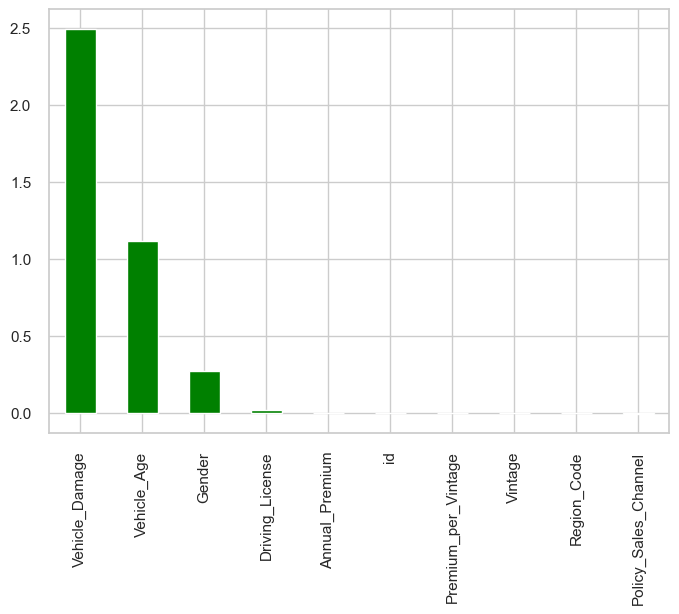

In [46]:
# To get weight of all variables
weights=pd.Series(model.coef_[0],index=x.columns.values)
# model.coef_[0]: Gets the feature weights.

print(weights.sort_values(ascending=False)[:10].plot(kind="bar",color="green"))
# weights.sort_values(ascending=False)[:10].plot(kind="bar", color="green"): Plots the top 10 coefficients as a bar chart.

Axes(0.125,0.11;0.775x0.77)


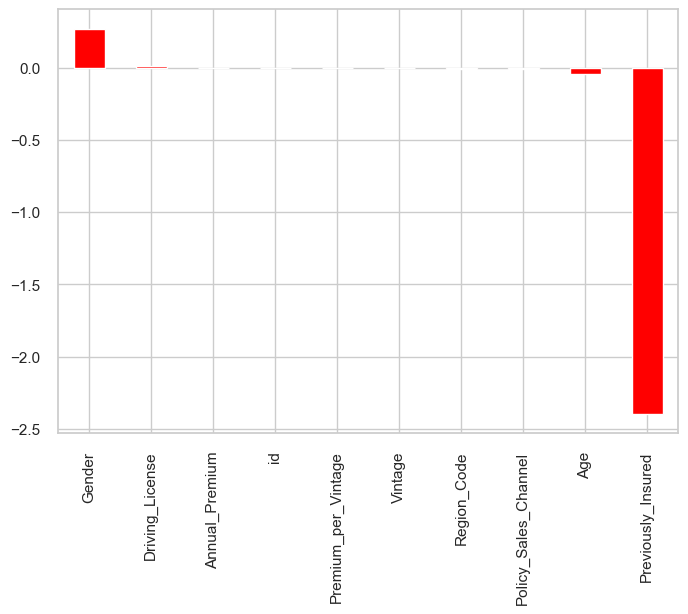

In [47]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar', color = 'red'))
# weights.sort_values(ascending=False)[-10:]: Selects the bottom 10 features.
# .plot(kind='bar', color='red'): Plots them as a red bar chart.

plt.show()

Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split the dataset into 80% training and 20% testing.
x_train, x_test, y_train, y_test = train_test_split(
    x_res, y_res, test_size=0.2, random_state=101
)

# Initialize the Decision Tree Classifier
model_dt = DecisionTreeClassifier(
    random_state=101,       # Ensures reproducibility
    max_depth=None,         # Tree grows fully (you can tune it)
    min_samples_leaf=1      # Minimum samples required in a leaf
)

# Train the Decision Tree model
model_dt.fit(x_train, y_train)

# Make predictions on the test data
prediction_test = model_dt.predict(x_test)

# Print accuracy score
print(metrics.accuracy_score(y_test, prediction_test))
# metrics.accuracy_score(y_test, prediction_test): Calculates and prints the accuracy score of the model.


0.8927631578947368


In [49]:
# Print Confusion Matrix
print(confusion_matrix(y_test, prediction_test))
# y_test: The true target values.
# prediction_test: The predicted values from the Decision Tree model.

[[59645  7455]
 [ 6889 59771]]


In [50]:
print(confusion_matrix(y_test, prediction_test))
# Print Classification Report
# y_test_rf: The true target values.
# prediction_test_rf: The predicted values from the model.
print("Classification Report for Decision Tree:")
print(classification_report(y_test, prediction_test))

[[59645  7455]
 [ 6889 59771]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     67100
           1       0.89      0.90      0.89     66660

    accuracy                           0.89    133760
   macro avg       0.89      0.89      0.89    133760
weighted avg       0.89      0.89      0.89    133760



Random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=101)
# train_test_split(x, y, test_size=0.2, random_state=101):Splits the dataset into 80% training and 20% testing.

model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=101, max_leaf_nodes=30)
# Initializes a Random Forest Classifier with 1000 trees, out-of-bag scoring (oob_score=True), parallel computation (n_jobs=-1),and a maximum of 30 leaf nodes per tree.

model_rf.fit(x_train, y_train)
# Trains the Random Forest model on the training dat


# Make predictions

prediction_test = model_rf.predict(x_test)
# prediction_test = model_rf.predict(x_test):Predicts the target values for the test set.

print(metrics.accuracy_score(y_test, prediction_test))
# metrics.accuracy_score(y_test, prediction_test):Calculates and prints the accuracy score of the model.

0.858739533492823


In [52]:
print(confusion_matrix(y_test,prediction_test))
# y_test: The true target values.
# preds: The predicted values from the model.

[[51781 15319]
 [ 3576 63084]]


In [53]:
print(confusion_matrix(y_test, prediction_test))
# y_test_rf: The true target values.
# prediction_test_rf: The predicted values from the model.
print("Classification Report for Random Forest:")
print(classification_report(y_test, prediction_test))

[[51781 15319]
 [ 3576 63084]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     67100
           1       0.80      0.95      0.87     66660

    accuracy                           0.86    133760
   macro avg       0.87      0.86      0.86    133760
weighted avg       0.87      0.86      0.86    133760



In [54]:
importances = model_rf.feature_importances_
# Retrieves the feature importance values (how much each feature contributes to the model).

weights = pd.Series(importances,index=x.columns.values)
# Converts the importances into a pandas Series with feature names as indices.

weights.sort_values()[-10:].plot(kind = 'barh')
# Sorts the importances in ascending order and selects the bottom 10 features.Plots the bottom 10 features as a horizontal bar chart.

plt.show()
# Displays plot

XGBoost

In [55]:
# Clean up column names for XGBoost compatibility
x_train.columns = [col.replace('<', 'less_than_').replace('>', 'greater_than_').replace('[', '_').replace(']', '_') for col in x_train.columns]
x_test.columns = [col.replace('<', 'less_than_').replace('>', 'greater_than_').replace('[', '_').replace(']', '_') for col in x_test.columns]

from xgboost import XGBClassifier
model = XGBClassifier()
# Initializes the XGBoost model with default parameters.

model.fit(x_train, y_train)
# Trains the XGBoost model on the training data.

preds = model.predict(x_test)
# Makes predictions on the test data.

metrics.accuracy_score(y_test, preds)
# Compares the true values (y_test) with the predicted values (preds) and calculates the accuracy.

0.9198190789473685

In [56]:
print(classification_report(y_test, preds))
# prints the classification report for the XGBoost model's predictions

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     67100
           1       0.97      0.86      0.91     66660

    accuracy                           0.92    133760
   macro avg       0.93      0.92      0.92    133760
weighted avg       0.92      0.92      0.92    133760



In [57]:
print(confusion_matrix(y_test,preds))
# prints the confusion matrix for the XGBoost model's predictions

[[65426  1674]
 [ 9051 57609]]


In [58]:
Responses=['0','1']

In [59]:
x_res_train,x_res_test,y_res_train,y_res_test=train_test_split(x_res,y_res,test_size=0.2,random_state=101)
# Splits the resampled dataset (x_res and y_res) into training and testing sets.
# test_size=0.2: 20% of the data will be used for testing.
#random_state=101: Ensures reproducibility of the split.

x_res_train.shape,x_res_test.shape
# (x_res_train, x_res_test): which tells you how many samples are in each set.

((535038, 12), (133760, 12))

In [60]:
# Clean up column names for XGBoost compatibility
x_res_train.columns = [col.replace('<', 'less_than_').replace('>', 'greater_than_').replace('[', '_').replace(']', '_') for col in x_res_train.columns]
x_res_test.columns = [col.replace('<', 'less_than_').replace('>', 'greater_than_').replace('[', '_').replace(']', '_') for col in x_res_test.columns]

from xgboost import XGBClassifier
model = XGBClassifier()
#Initializes the XGBoost classifier with default parameterss.

model.fit(x_res_train, y_res_train)
# Trains the model using the resampled training data (x_res_train, y_res_train).

preds = model.predict(x_res_test)
# Makes predictions on the resampled test data (x_res_test).

metrics.accuracy_score(y_res_test, preds)
# Compares the true values (y_res_test) with the predicted values (preds) and calculates the accuracy scores

0.9198190789473685

In [61]:
print(classification_report(y_res_test, preds))
# prints the classification report for the XGBoost model's predictions on the resampled test data

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     67100
           1       0.97      0.86      0.91     66660

    accuracy                           0.92    133760
   macro avg       0.93      0.92      0.92    133760
weighted avg       0.92      0.92      0.92    133760



In [62]:

print(confusion_matrix(y_res_test,preds))
# prints the confusion matrix for the XGBoost model's predictions on the resampled test data

[[65426  1674]
 [ 9051 57609]]


In [70]:
from yellowbrick.classifier import ConfusionMatrix
from xgboost import XGBClassifier

# Define and train the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
#Initializes an XGBoost classifier with use_label_encoder=False (to suppress warnings) and eval_metric='logloss' (to use logarithmic loss as the evaluation metric),random_state=0 ensures reproducibility.


xgb_clf.fit(x_res_train, y_res_train)
# Trains the XGBoost classifier on the resampled training data (x_res_train, y_res_train)


xgb_cm = ConfusionMatrix(xgb_clf, Responses=Responses, cmap='GnBu')
# Creates a confusion matrix visualizer using the trained model.
#Responses=Responses should be replaced with the actual column name or list that corresponds to the response variable (the target column).


xgb_cm.score(x_res_test, y_res_test)
# Evaluate the model using the resampled test data (x_res_test, y_res_test)

# Displays the confusion matrix visualizationm
xgb_cm.show()

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [71]:
from yellowbrick.classifier import ROCAUC
from xgboost import XGBClassifier
from yellowbrick.style import set_palette

# Define and train the XGBoost classifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
# Initializes an XGBoost classifier with use_label_encoder=False (to avoid warnings), and eval_metric='logloss' (logarithmic loss as the evaluation metric), random_state=0 ensures reproducibility.

xgb_clf.fit(x_res_train, y_res_train)
# Trains the model using the resampled training data (x_res_train, y_res_train)

# Create the ROC AUC visualizer
visualizer = ROCAUC(xgb_clf, Responses=Responses)
# Replace Responses with the actual response variable name.

# Set a bold color palette
set_palette('bold')

# Fit the visualizer with the resampled training data.
visualizer.fit(x_res_train, y_res_train)        # Fit the training data to the visualizer

# Score the model on the test data
visualizer.score(x_res_test, y_res_test)        # Evaluate the model on the resampled test data

# Finalize and render the figure
visualizer.show()
# Displays the ROC AUC curve.

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

Model comparison

In [72]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC # Using LinearSVC as SVC is too slow on large datasets
from sklearn.metrics import classification_report
import numpy as np

# Ensure RANDOM_STATE is defined (it's defined in the initial imports cell)
# RANDOM_STATE = 42

print("Setting up models for comparison...")

# --- 1. Set consistent test sets for comparison (using SMOTE resampled test data) ---
X_test = x_res_test
y_test = y_res_test

# --- 2. Train and evaluate models on resampled data for fair comparison ---

# --- Logistic Regression ---
print("  Training Logistic Regression...")
lr_final = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE, solver='liblinear')
lr_final.fit(x_res_train, y_res_train)
lr_preds = lr_final.predict(X_test)
y_prob_lr = lr_final.predict_proba(X_test)[:, 1]
lr_report = classification_report(y_test, lr_preds, output_dict=True, zero_division=0)

# --- Decision Tree ---
print("  Training Decision Tree...")
dt_final = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt_final.fit(x_res_train, y_res_train)
dt_preds = dt_final.predict(X_test)
y_prob_dt = dt_final.predict_proba(X_test)[:, 1]
dt_report = classification_report(y_test, dt_preds, output_dict=True, zero_division=0)

# --- Random Forest ---
print("  Training Random Forest...")
# Reduced n_estimators for slightly faster training for comparison purposes
rf_final = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=RANDOM_STATE, max_leaf_nodes=30)
rf_final.fit(x_res_train, y_res_train)
rf_preds = rf_final.predict(X_test)
y_prob_rf = rf_final.predict_proba(X_test)[:, 1]
rf_report = classification_report(y_test, rf_preds, output_dict=True, zero_division=0)



# --- AdaBoost ---
print("  Training AdaBoost...")
ada_final = AdaBoostClassifier(random_state=RANDOM_STATE)
ada_final.fit(x_res_train, y_res_train)
ada_preds = ada_final.predict(X_test)
y_prob_ada = ada_final.predict_proba(X_test)[:, 1]
ada_report = classification_report(y_test, ada_preds, output_dict=True, zero_division=0)

# --- XGBoost (re-training a new instance to ensure it's named `xgb_final` and for consistency) ---
print("  Training XGBoost...")
x_res_train.columns = [col.replace('<', 'less_than_').replace('>', 'greater_than_').replace('[', '_').replace(']', '_') for col in x_res_train.columns]
X_test.columns = [col.replace('<', 'less_than_').replace('>', 'greater_than_').replace('[', '_').replace(']', '_') for col in X_test.columns]
xgb_final = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE)
xgb_final.fit(x_res_train, y_res_train)
xgb_preds = xgb_final.predict(X_test)
y_prob_xgb = xgb_final.predict_proba(X_test)[:, 1]
xgb_report = classification_report(y_test, xgb_preds, output_dict=True, zero_division=0)

# --- 3. Construct results_df ---
results_data = []

def get_metrics_for_class_1(report_dict):
    return {
        "Accuracy": report_dict['accuracy'],
        "Precision": report_dict['1']['precision'],
        "Recall": report_dict['1']['recall'],
        "F1 Score": report_dict['1']['f1-score']
    }

results_data.append({"Model": "Logistic Regression", **get_metrics_for_class_1(lr_report)})
results_data.append({"Model": "Decision Tree", **get_metrics_for_class_1(dt_report)})
results_data.append({"Model": "Random Forest", **get_metrics_for_class_1(rf_report)})
results_data.append({"Model": "XGBoost", **get_metrics_for_class_1(xgb_report)})

results_df = pd.DataFrame(results_data)
print("\nResults DataFrame created:")
display(results_df)


Setting up models for comparison...
  Training Logistic Regression...
  Training Decision Tree...
  Training Random Forest...
  Training AdaBoost...
  Training XGBoost...

Results DataFrame created:


Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.782499   0.706124  0.965302  0.815619
1        Decision Tree  0.892987   0.889109  0.897165  0.893118
2        Random Forest  0.860923   0.808679  0.944344  0.871262
3              XGBoost  0.919819   0.971763  0.864221  0.914842

In [73]:
train_score = xgb_final.score(x_res_train, y_res_train)
test_score  = xgb_final.score(x_res_test, y_res_test)

print("\nXGBoost Model Performance:")
print(f"Train Score: {train_score:.4f}")
print(f"Test Score : {test_score:.4f}")



XGBoost Model Performance:
Train Score: 0.9224
Test Score : 0.9198


In [74]:
# 0. Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import set_config # Import set_config

# Set global configuration for transformer output to pandas
set_config(transform_output="pandas") # This ensures ColumnTransformer outputs DataFrames and expects DataFrame input when using string column names


RANDOM_STATE = 42

# --- Fix: Define df_fe and drop 'id' column ---
df_fe = df.copy() # Initialize df_fe from the existing 'df'
if 'id' in df_fe.columns:
    df_fe = df_fe.drop('id', axis=1)

# 1. Prepare X, y from your feature-engineered dataframe (df_fe)
#    Adjust these lists if your column names differ
#    The list comprehensions will filter out features not present in df_fe
numeric_features = [c for c in ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage','Annual_Premium_Log','Age_DL_Interaction','Premium_per_Vintage'] if c in df_fe.columns]
binary_features  = [c for c in ['Driving_License','Previously_Insured','High_Premium_Flag'] if c in df_fe.columns]
categorical_features = [c for c in ['Gender','Vehicle_Age','Vehicle_Damage'] if c in df_fe.columns]

features = numeric_features + binary_features + categorical_features
X = df_fe[features]     # Keep X as a DataFrame
y = df_fe['Response'].values

# 2. Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
# train_test_split(X, y, ...): Splits the dataset into 80% training and 20% testing.

# 3. Preprocessing (ColumnTransformer) used inside pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Added sparse_output=False
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, numeric_features),
    ('bin', 'passthrough', binary_features),
    ('cat', cat_pipe, categorical_features)
])

# 4. Model pipeline (preprocessing + logistic regression)
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=RANDOM_STATE, solver='liblinear'))
])

# 5. Stratified K-Fold Cross Validation (before final training)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
cv_scores = cross_val_score(pipe, X, y, cv=skf, scoring='accuracy', n_jobs=-1)
print("CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# 6. Train final pipeline on train set (after CV)
pipe.fit(X_train, y_train)

# 7. Test accuracy (PRINTED LAST)
y_test_pred = pipe.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


CV Accuracy Scores: [0.87741072 0.87735824 0.8774632  0.87743696 0.87740911]
Mean CV Accuracy: 0.877415647474779
Test Accuracy: 0.8774369604576107


final


In [75]:
# Import necessary libraries for data manipulation (pandas, numpy), preprocessing (LabelEncoder, MinMaxScaler, SimpleImputer), handling class imbalance (SMOTE),
# machine learning (XGBClassifier), and saving the model (joblib).

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from joblib import dump
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.impute import SimpleImputer

# Load data
df = pd.read_csv("insurance.csv")

# Drop unnecessary column
df.drop(columns=["id"], axis=1, inplace=True)

#Converts Vehicle_Damage into numerical values: Yes ? 1, No ? 0
df["Vehicle_Damage"].replace(to_replace="Yes",value=1,inplace=True)
df["Vehicle_Damage"].replace(to_replace="No",value=0,inplace=True)

#Encodes Gender and Vehicle_Age using LabelEncoder to turn categorical values into numbers (e.g., Male/Female ? 1/0)
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df["Vehicle_Age"] = label_encoder.fit_transform(df["Vehicle_Age"])


df_dummies=pd.get_dummies(df)
# Creates dummy variables for categorical features, turning them into a one-hot encoded format.

x = df.drop(['Response'], axis = 1)
y = df.loc[:,'Response'].values
# Separates the dataset into x (features) and y (target variable Response)

x.dropna(inplace=True)
# Drops rows in x with missing values.

imputer = SimpleImputer(strategy='mean') # Choose a strategy: 'mean', 'median', 'most_frequent'


# Impute missing values in 'x' before dropping rows in 'y'
x = imputer.fit_transform(x)

# Now, align 'y' with 'x' after imputation:
x = pd.DataFrame(x)  # Convert x back to DataFrame for indexing
x.reset_index(drop=True, inplace=True) # Reset index of x
# Converts x back to a DataFrame and resets its index
y = y[x.index]  # Ensures y aligns with x after imputation.

# Now apply SMOTE
sm = SMOTE(random_state=42)
# Uses SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset by oversampling the minority class.

# Use 'x' instead of 'X' as input to fit_resample
x_res, y_res = sm.fit_resample(x, y)

# Train the Model
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_res, y_res)
# Trains the model using the oversampled dataset (x_res, y_res).


# Save the trained model
dump(model, 'insurance_model_sm.joblib')  # Saves the trained model to a file (insurance_model_sm.joblib) for later use.

['insurance_model_sm.joblib']